In [16]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('34_25.csv', header = None)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-11.981267,-0.130413,9.033388,1.964282,3.676288,5.183542,5.612202,-0.917802,0.380501,-7.709989
std,13.269096,11.354465,16.659130,13.102835,18.223128,15.386386,12.094068,16.806438,12.954919,7.866304
min,-27.085191,-21.213137,-23.338907,-20.357029,-26.529580,-23.446092,-15.440784,-19.261979,-18.131860,-21.142902
25%,-23.222496,-3.598646,2.055453,-6.471149,-11.989129,-1.361888,-4.017736,-14.408009,-11.435611,-16.183697
50%,-15.313887,0.628468,17.828131,4.992956,15.204040,9.881208,6.902863,-11.877140,-2.089046,-3.593552
75%,-6.713504,7.688789,21.247112,8.010751,16.996333,17.324385,16.321132,18.253236,14.538382,-1.186457
max,13.255663,14.811178,26.898831,22.348029,24.323255,24.602995,22.733372,23.483258,17.549075,3.277325


In [17]:
df.shape

(60, 10)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, svd_solver = 'full') 
pca.fit(df)
pca_data = pca.transform(df)

In [19]:
pca_data[0]

array([-34.78385542, -22.59549992])

In [20]:
print(pca.components_.shape) # В нашем случае матрица размер 2 х 64
pca.components_

(2, 10)


array([[-0.36473588,  0.24394626, -0.36383253,  0.10228378, -0.4870481 ,
         0.47469584, -0.33157808, -0.01600977, -0.3007137 ,  0.03795825],
       [-0.30421944,  0.17689533,  0.28426821,  0.39936724,  0.36324946,
         0.12301852, -0.14367271,  0.67994955,  0.0233215 , -0.07249211]])

In [21]:
pca = PCA(n_components = 10, svd_solver = 'full') 
pca_data = pca.fit_transform(df) 

In [22]:
pca.explained_variance_

array([804.5591756 , 601.40803518, 391.14124811, 172.68203495,
         3.01585355,   2.66368126,   2.15190032,   1.63190836,
         1.19936941,   1.00523358])

In [23]:
pca.explained_variance_ratio_

array([0.40604393, 0.30351786, 0.19740068, 0.08714896, 0.00152204,
       0.0013443 , 0.00108602, 0.00082359, 0.0006053 , 0.00050732])

In [24]:
import numpy as np
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.40604393, 0.7095618 , 0.90696248, 0.99411144, 0.99563347,
       0.99697778, 0.99806379, 0.99888738, 0.99949268, 1.        ])

In [27]:
# sns.lineplot(np.arange(1,11), explained_variance, ls = '-')

In [28]:
treshold = 0.85
dim = 0
for value in explained_variance:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1

Минимальное количество ГК для заданного порога:  3


In [29]:
# sns.scatterplot(pca_data[:, 0], pca_data[:, 1])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

ЧАСТЬ 2

In [30]:
df = pd.read_csv('X_reduced_408.csv', header = None, delimiter = ';')
Phi = pd.read_csv('X_loadings_408.csv', header = None, delimiter = ';')

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
1,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
2,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
3,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
4,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928


In [32]:
df.shape

(100, 10)

In [33]:
Phi.shape

(100, 10)

In [34]:
restored = np.dot(df, Phi.T)

In [35]:
restored.shape

(100, 100)

<AxesSubplot: >

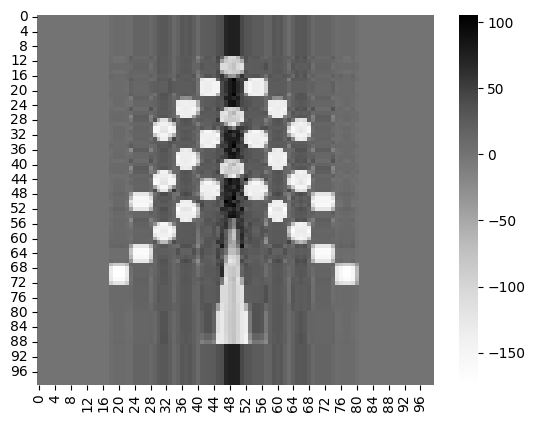

In [36]:
sns.heatmap(restored, cmap = 'Greys')